# **Tarea 2 Grafos de recetas**
#### José Luis Toro Pinto

## 1a. Objetivo central y metodología
El objetivo central de este reporte es analizar la información de ingredientes de recetas en bases a metodologías de grafos.

<span style="color:red"> 

- falta explicar un poco más la idea de la tarea.
    
</span>

Para esto los datos se tomarán de la siguiente manera

- Cada ingrediente será un nodo.
- Si dos ingredientes están en la misma receta habrá entre estos una arista de peso uno, el peso aumentará en base a cuantas veces se encuentre este par de ingredientes en cada receta.


In [1]:
#importando librerias
import csv
import networkx as nx
import json
from tabulate import tabulate


In [2]:
#cargar los datos
with open("./train.json", 'r') as f:
    data = json.load(f)

Miramos un ejemplo de los datos cargados

In [3]:
data[1]

{'id': 25693,
 'cuisine': 'southern_us',
 'ingredients': ['plain flour',
  'ground pepper',
  'salt',
  'tomatoes',
  'ground black pepper',
  'thyme',
  'eggs',
  'green tomatoes',
  'yellow corn meal',
  'milk',
  'vegetable oil']}

Parseamos los datos para los distintos análisis

In [4]:
# get nodes and edge
nodes = set()
for recipe in data:
    nodes.update(recipe['ingredients'])

cultures = set()
ingredients_in_culture = dict()
for recipe in data:
    cultures.update([recipe['cuisine']])
    if recipe['cuisine'] in ingredients_in_culture.keys():
        ingredients_in_culture[recipe['cuisine']].update(recipe['ingredients'])
    else:
        ingredients_in_culture[recipe['cuisine']] = set()
        ingredients_in_culture[recipe['cuisine']].update(recipe['ingredients'])

## Vista General de datos
En general tenemos en cuanto a datos:
- Al rededor de 39700 Recetas
- Al rededor de 64000 Ingredientes únicos
- X Culturas culinarias

¿por qué X?

Desde aquí podemos revisar algunos datos de nodos destacados:

In [5]:
recipes_by_ingredients = []
for i,node in enumerate(nodes):
    recipes_by_ingredients.append([node, 0])
    for recipe in data:
        if node in recipe['ingredients']:
            recipes_by_ingredients[i][1] += 1


## Top 15 de Ingredientes con más apariciones en recetas

Dentro de la siguiente tabla podemos ver como los ingredientes más comunes dentro de las recetas no son lo que podríamos llamar la "base" de la receta sino que acompañamientos, especias, bases, etc. Esto puede generar ruido dentro de los datos, especialmente si queremos mirar ingredientes particulares compartidos de cada cultura que nos pueda entregar similitudes entre estas.

In [6]:
from operator import itemgetter
top = sorted(recipes_by_ingredients, key=itemgetter(1), reverse=True)[:15]
header = ["Ingrediente", "N° de apariciones en recetas"]
print(tabulate(top, headers=header, tablefmt="grid"))

+---------------------+--------------------------------+
| Ingrediente         |   N° de apariciones en recetas |
+=====================+================================+
| salt                |                          18048 |
+---------------------+--------------------------------+
| onions              |                           7972 |
+---------------------+--------------------------------+
| olive oil           |                           7971 |
+---------------------+--------------------------------+
| water               |                           7457 |
+---------------------+--------------------------------+
| garlic              |                           7380 |
+---------------------+--------------------------------+
| sugar               |                           6434 |
+---------------------+--------------------------------+
| garlic cloves       |                           6236 |
+---------------------+--------------------------------+
| butter              |        

## Cantidad de recetas e ingredientes únicos por cultura culinaria

En la siguiente tabla podemos ver **una tendencia entre la cantidad de recetas registradas por cultura y la cantidad de ingredientes únicos**. Mientras más recetas tenga la cultura mayor será la diversidad de ingredientes que tengan. Hay pequeñas desviaciones de la tendencia como es el caso de la cocina Inglesa cuya cantidad de ingredientes es considerable a pesar de tener una cantidad menor de recetas comparado con otras culturas. Este último punto puede ser un enfoque de analisis en alguna investigación posterior como **¿Es más compleja la comida Inglesa y por ende usa más diversidad de ingredientes?** Por ejemplo

<span style="color:red"> 

- Está súper bacán esto, quizás podrías graficarlo en 2D.

</span>

In [7]:
recipes_per_culture = []
for i,culture in enumerate(cultures):
    recipes_per_culture.append([culture, 0, len(ingredients_in_culture[culture])])
    for recipe in data:
        if culture in recipe['cuisine']:
            recipes_per_culture[i][1] += 1

In [8]:
top = sorted(recipes_per_culture, key=itemgetter(1), reverse=True)[:15]
header = ["Cultura", "N° de recetas", "N° de Ingredientes Únicos"]
print(tabulate(top, headers=header, tablefmt="grid"))

+--------------+-----------------+-----------------------------+
| Cultura      |   N° de recetas |   N° de Ingredientes Únicos |
+==============+=================+=============================+
| italian      |            7838 |                        2929 |
+--------------+-----------------+-----------------------------+
| mexican      |            6438 |                        2684 |
+--------------+-----------------+-----------------------------+
| southern_us  |            4320 |                        2462 |
+--------------+-----------------+-----------------------------+
| indian       |            3003 |                        1664 |
+--------------+-----------------+-----------------------------+
| chinese      |            2673 |                        1792 |
+--------------+-----------------+-----------------------------+
| french       |            2646 |                        2102 |
+--------------+-----------------+-----------------------------+
| cajun_creole |         

## Generación del grafo
En la presente sección generamos el grafo conectado con las características discutidas previamente

In [10]:
from collections import namedtuple
import itertools
Edge = namedtuple("Edge", ["node1", "node2"])
edges_info = dict()
used_nodes = []
i = 0
for recipe in data:
    i += 1
    if i%1000 == 0:
        print("On recipe N° {}".format(i))
    for node, ingredient in itertools.combinations(recipe["ingredients"], 2):
            
            tmp_node1 = Edge(node, ingredient)
            tmp_node2 = Edge(ingredient, node)
            keys = edges_info.keys()
            if tmp_node1 in keys:
                edges_info[tmp_node1] += 1
            elif tmp_node2 in keys:
                edges_info[tmp_node2] += 1
            else:
                edges_info[tmp_node2] = 1


On recipe N° 1000
On recipe N° 2000
On recipe N° 3000
On recipe N° 4000
On recipe N° 5000
On recipe N° 6000
On recipe N° 7000
On recipe N° 8000
On recipe N° 9000
On recipe N° 10000
On recipe N° 11000
On recipe N° 12000
On recipe N° 13000
On recipe N° 14000
On recipe N° 15000
On recipe N° 16000
On recipe N° 17000
On recipe N° 18000
On recipe N° 19000
On recipe N° 20000
On recipe N° 21000
On recipe N° 22000
On recipe N° 23000
On recipe N° 24000
On recipe N° 25000
On recipe N° 26000
On recipe N° 27000
On recipe N° 28000
On recipe N° 29000
On recipe N° 30000
On recipe N° 31000
On recipe N° 32000
On recipe N° 33000
On recipe N° 34000
On recipe N° 35000
On recipe N° 36000
On recipe N° 37000
On recipe N° 38000
On recipe N° 39000


In [16]:
G = nx.Graph()
for key,value in edges_info.items():
    node1, node2 = key
    G.add_edge(node1, node2, weight=value)
to_remove = [
    "salt",
    "sugar",
    "water",
    "onions",
    "garlic",
    "olive oil",
    "garlic cloves",
    "ground black pepper",
    "vegetable oil",
    "pepper"
]
for n in to_remove:
    G.remove_node(n)

Para aliviar el procesamiento y facilitar la visualización se hará un podado de los nodos en base a la centralidad de estos. Luego de analizar el grafo mediante dos centralidades, de grado y de vector propio, se decidió por usar esta última como medida de corte puesto que nos interesa ver los nodos de recetas interconectados.

In [17]:
header = [
    "Nodo", 
    "Grado", 
    "Eigenvector", 
    #"Harmónica"
]
table= []
#Generamos las tuplas para la tabla
degree = nx.algorithms.degree_centrality(G)
eigen = nx.algorithms.eigenvector_centrality(G)
#harmonic = nx.algorithms.harmonic_centrality(G)

for node in list(G.nodes):
    row = [
        node,
        degree[node],
        eigen[node],
        #harmonic[species]
    ]
    table.append(row)
    
top = sorted(table, key=itemgetter(2), reverse=True)[:1000]
print(tabulate(top[:10], headers=header, tablefmt="grid"))

+-------------------+----------+---------------+
| Nodo              |    Grado |   Eigenvector |
+===================+==========+===============+
| butter            | 0.43861  |     0.0687715 |
+-------------------+----------+---------------+
| kosher salt       | 0.40176  |     0.0684476 |
+-------------------+----------+---------------+
| carrots           | 0.397583 |     0.0676468 |
+-------------------+----------+---------------+
| all-purpose flour | 0.402208 |     0.066449  |
+-------------------+----------+---------------+
| black pepper      | 0.360734 |     0.0663364 |
+-------------------+----------+---------------+
| eggs              | 0.39624  |     0.0658979 |
+-------------------+----------+---------------+
| tomatoes          | 0.365657 |     0.0649896 |
+-------------------+----------+---------------+
| green onions      | 0.35775  |     0.0649125 |
+-------------------+----------+---------------+
| large eggs        | 0.357004 |     0.0630878 |
+-------------------

De estos seleccionados los 1000 nodos con la mayor centralidad de vector propio para genera un subgrafo con el cual trabajaremos desde ahora.

**NOTA**: Eliminaremos los 10 nodos mejor clasificados puesto a que son condimentos y los consideraremos como ruido para nuestro análisis

<span style="color:red"> 

- funcionan como las stopwords
</span>

In [18]:
top_nodes = [x[0] for x in top]

SG = G.subgraph(top_nodes)

## Visualización de conexiones
Como podemos apreciar aún con 1000 nodos se hace dificil la visualización de los nodos pero para mejorar esta se han dibujado sólo las aristas con peso mayor a mil, en rojo, estando las que tienen un peso mayor de 200 en rojo

<span style="color:red"> 

- deberías explicar qué significa esta visualización. Está un poco difícil.
</span>

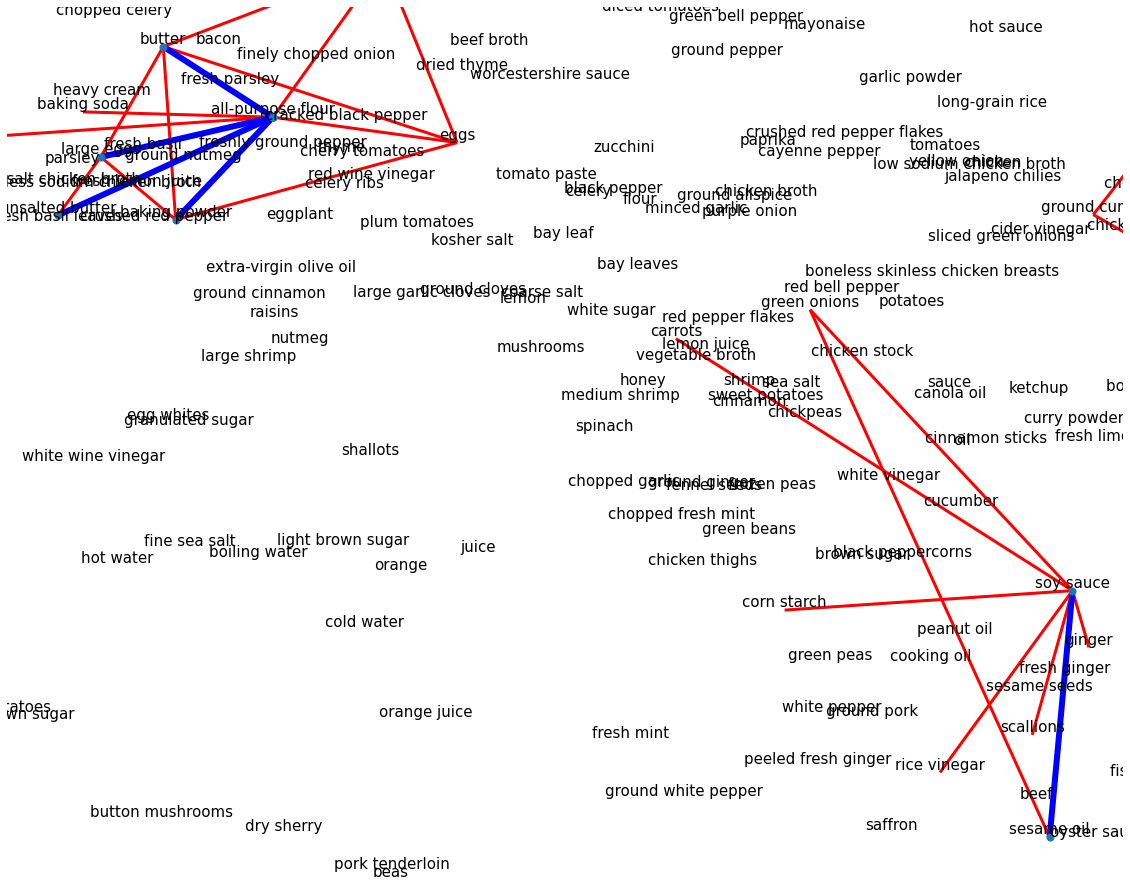

In [20]:
import matplotlib.pyplot as plt
elarger = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 500]

elargerer = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 1000]

nodes_top = []
for (u, v, d) in SG.edges(data=True):
    if d["weight"] > 1000:
        nodes_top.append(u)
        nodes_top.append(v)


plt.figure(1,figsize=(20,16))
pos = nx.spring_layout(SG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(nodes_top, pos, node_size=50)
nx.draw_networkx_edges(SG, pos, edgelist=elarger, width=3, edge_color = 'r')
nx.draw_networkx_edges(SG, pos, edgelist=elargerer, width=6, edge_color = 'b')
nx.draw_networkx_labels(SG, pos, font_size=15, font_family="sans-serif", verticalalignment='bottom' )
plt.axis("off")
plt.show()

## Visualización más cercana de las aristas con peso mayor a 2000

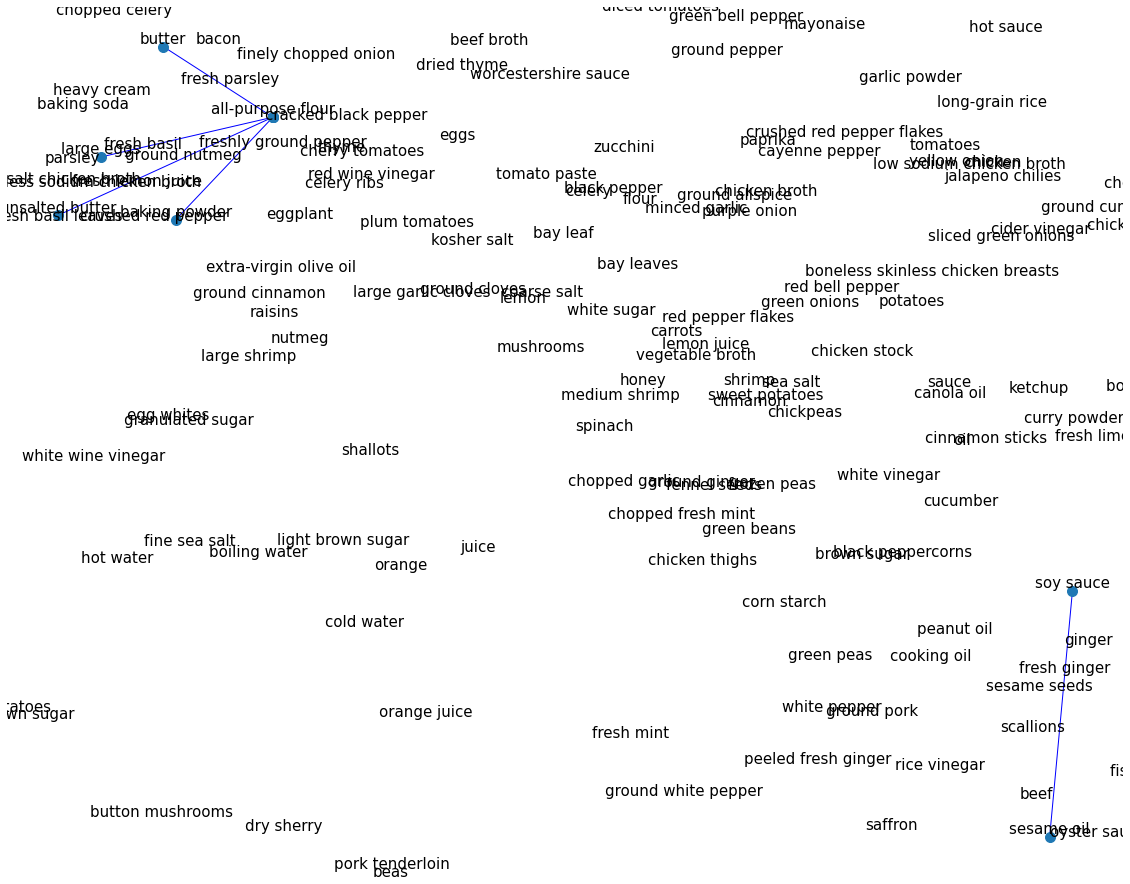

In [23]:
elargerer = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 1000]

nodes_top = []
for (u, v, d) in SG.edges(data=True):
    if d["weight"] > 1000:
        nodes_top.append(u)
        nodes_top.append(v)
    
plt.figure(1,figsize=(20,16))
#pos = nx.spring_layout(SG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(nodes_top, pos, node_size=100)

nx.draw_networkx_edges(SG, pos, edgelist=elargerer, width=1, edge_color = 'b')
nx.draw_networkx_labels(SG, pos, font_size=15, font_family="sans-serif", verticalalignment='bottom' )
plt.axis("off")
plt.show()

In [24]:
from node2vec import Node2Vec

node2vec = Node2Vec(SG, dimensions=100, walk_length=16, num_walks=100, workers = 4)

Computing transition probabilities: 100%|██████████| 1000/1000 [26:33<00:00,  1.59s/it]


In [25]:
model = node2vec.fit(window=10, min_count=1)

In [202]:
model

In [26]:
from sklearn.manifold import TSNE

In [27]:
X = model[model.wv.vocab]

<ipython-input-27-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [28]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [30]:
import pandas as pd
pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])

,tsne1,tsne2
0,-25.088480,8.207381
1,8.707812,-6.495591
2,4.854294,-18.846342
3,-26.745180,-10.193820
4,-23.257376,6.768105
...,...,...
995,20.323811,-13.413704
996,10.209380,-10.998829
997,24.900969,-19.102264
998,22.231512,14.928511


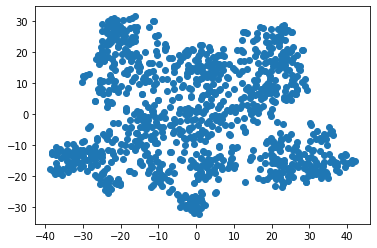

In [31]:
df = pd.DataFrame(X_embedded, columns=['x', 'y'])

tsne_results=pd.DataFrame(X_embedded, columns=['x', 'y'])

plt.scatter(tsne_results['x'], tsne_results['y'])

plt.show()

[[-16.926897   17.27452  ]
 [ 24.811312  -14.109418 ]
 [ 13.594055   12.195605 ]
 [-14.498127  -13.8155365]]


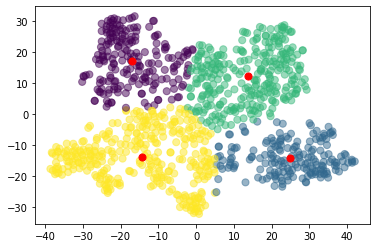

In [32]:
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans = cluster.KMeans(n_clusters=6)
 
kmeans = KMeans(n_clusters=4).fit(tsne_results)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(tsne_results['x'], tsne_results['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# REVISEMOS 2 CULTURAS DIFERENTES
Tomemos 2 culturas alejadas y veamos cono se distribuyen los clusters y si existe alguna similitud con la representación general en 2 dimensiones con cada uno por separado.
Las culturas a investigar son:
- Britanica
- Koreana

## Britanica

In [33]:
   
from collections import namedtuple
import itertools
Edge = namedtuple("Edge", ["node1", "node2"])
edges_info = dict()
used_nodes = []
i = 0
for recipe in data:
    i += 1
    if i%1000 == 0:
        print("On recipe N° {}".format(i))
    if recipe["cuisine"] == "british":
        for node, ingredient in itertools.combinations(recipe["ingredients"], 2):
            
            tmp_node1 = Edge(node, ingredient)
            tmp_node2 = Edge(ingredient, node)
            keys = edges_info.keys()
            if tmp_node1 in keys:
                edges_info[tmp_node1] += 1
            elif tmp_node2 in keys:
                edges_info[tmp_node2] += 1
            else:
                edges_info[tmp_node2] = 1

On recipe N° 1000
On recipe N° 2000
On recipe N° 3000
On recipe N° 4000
On recipe N° 5000
On recipe N° 6000
On recipe N° 7000
On recipe N° 8000
On recipe N° 9000
On recipe N° 10000
On recipe N° 11000
On recipe N° 12000
On recipe N° 13000
On recipe N° 14000
On recipe N° 15000
On recipe N° 16000
On recipe N° 17000
On recipe N° 18000
On recipe N° 19000
On recipe N° 20000
On recipe N° 21000
On recipe N° 22000
On recipe N° 23000
On recipe N° 24000
On recipe N° 25000
On recipe N° 26000
On recipe N° 27000
On recipe N° 28000
On recipe N° 29000
On recipe N° 30000
On recipe N° 31000
On recipe N° 32000
On recipe N° 33000
On recipe N° 34000
On recipe N° 35000
On recipe N° 36000
On recipe N° 37000
On recipe N° 38000
On recipe N° 39000


In [34]:
B = nx.Graph()
for key,value in edges_info.items():
    node1, node2 = key
    B.add_edge(node1, node2, weight=value)
to_remove = [
    "salt",
    "sugar",
    "water",
    "onions",
    "garlic",
    "olive oil",
    "garlic cloves",
    "ground black pepper",
    "vegetable oil",
    "pepper"
]
for n in to_remove:
    B.remove_node(n)

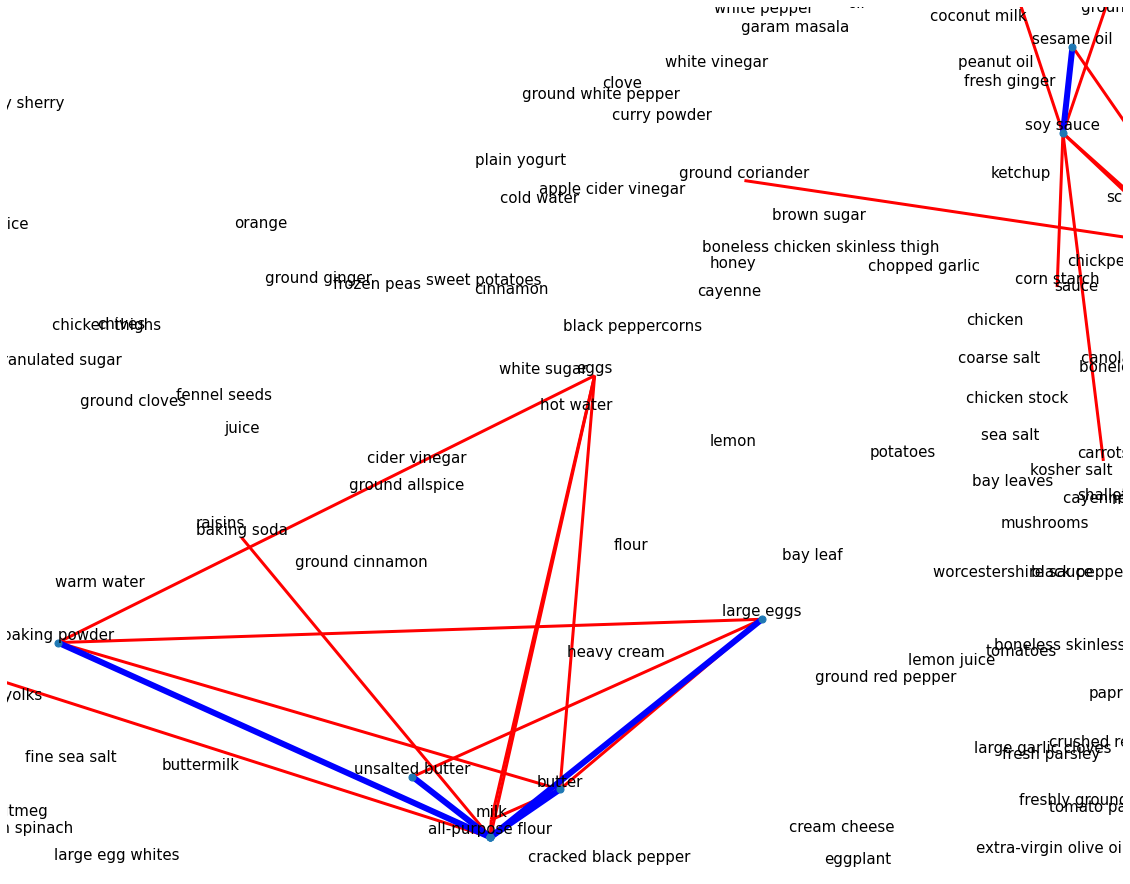

In [35]:
import matplotlib.pyplot as plt
elarger = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 500]

elargerer = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 1000]

nodes_top = []
for (u, v, d) in SG.edges(data=True):
    if d["weight"] > 1000:
        nodes_top.append(u)
        nodes_top.append(v)


plt.figure(1,figsize=(20,16))
pos = nx.spring_layout(SG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(nodes_top, pos, node_size=50)
nx.draw_networkx_edges(SG, pos, edgelist=elarger, width=3, edge_color = 'r')
nx.draw_networkx_edges(SG, pos, edgelist=elargerer, width=6, edge_color = 'b')
nx.draw_networkx_labels(SG, pos, font_size=15, font_family="sans-serif", verticalalignment='bottom' )
plt.axis("off")
plt.show()

In [36]:
node2vec = Node2Vec(B, dimensions=100, walk_length=16, num_walks=100, workers = 4)

Computing transition probabilities: 100%|██████████| 1156/1156 [00:16<00:00, 70.49it/s] 


In [38]:
X_embedded = TSNE(n_components=2).fit_transform(X)

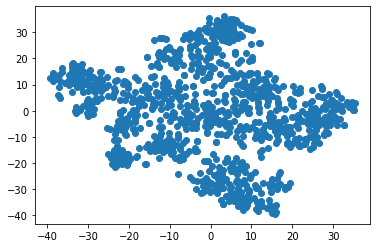

In [39]:
df = pd.DataFrame(X_embedded, columns=['x', 'y'])

tsne_results=pd.DataFrame(X_embedded, columns=['x', 'y'])

plt.scatter(tsne_results['x'], tsne_results['y'])

plt.show()

[[  7.05364    -28.516035  ]
 [ -0.65751314  22.6356    ]
 [-28.292635     8.962994  ]
 [ 18.35672     -0.89107895]
 [-11.6458025   -6.8476586 ]]


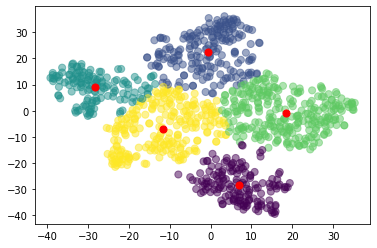

In [44]:
kmeans = cluster.KMeans(n_clusters=6)
 
kmeans = KMeans(n_clusters=5).fit(tsne_results)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(tsne_results['x'], tsne_results['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Koreana

In [45]:
   
from collections import namedtuple
import itertools
Edge = namedtuple("Edge", ["node1", "node2"])
edges_info = dict()
used_nodes = []
i = 0
for recipe in data:
    i += 1
    if i%1000 == 0:
        print("On recipe N° {}".format(i))
    if recipe["cuisine"] == "korean":
        for node, ingredient in itertools.combinations(recipe["ingredients"], 2):
            
            tmp_node1 = Edge(node, ingredient)
            tmp_node2 = Edge(ingredient, node)
            keys = edges_info.keys()
            if tmp_node1 in keys:
                edges_info[tmp_node1] += 1
            elif tmp_node2 in keys:
                edges_info[tmp_node2] += 1
            else:
                edges_info[tmp_node2] = 1

On recipe N° 1000
On recipe N° 2000
On recipe N° 3000
On recipe N° 4000
On recipe N° 5000
On recipe N° 6000
On recipe N° 7000
On recipe N° 8000
On recipe N° 9000
On recipe N° 10000
On recipe N° 11000
On recipe N° 12000
On recipe N° 13000
On recipe N° 14000
On recipe N° 15000
On recipe N° 16000
On recipe N° 17000
On recipe N° 18000
On recipe N° 19000
On recipe N° 20000
On recipe N° 21000
On recipe N° 22000
On recipe N° 23000
On recipe N° 24000
On recipe N° 25000
On recipe N° 26000
On recipe N° 27000
On recipe N° 28000
On recipe N° 29000
On recipe N° 30000
On recipe N° 31000
On recipe N° 32000
On recipe N° 33000
On recipe N° 34000
On recipe N° 35000
On recipe N° 36000
On recipe N° 37000
On recipe N° 38000
On recipe N° 39000


In [46]:
B = nx.Graph()
for key,value in edges_info.items():
    node1, node2 = key
    B.add_edge(node1, node2, weight=value)
to_remove = [
    "salt",
    "sugar",
    "water",
    "onions",
    "garlic",
    "olive oil",
    "garlic cloves",
    "ground black pepper",
    "vegetable oil",
    "pepper"
]
for n in to_remove:
    B.remove_node(n)

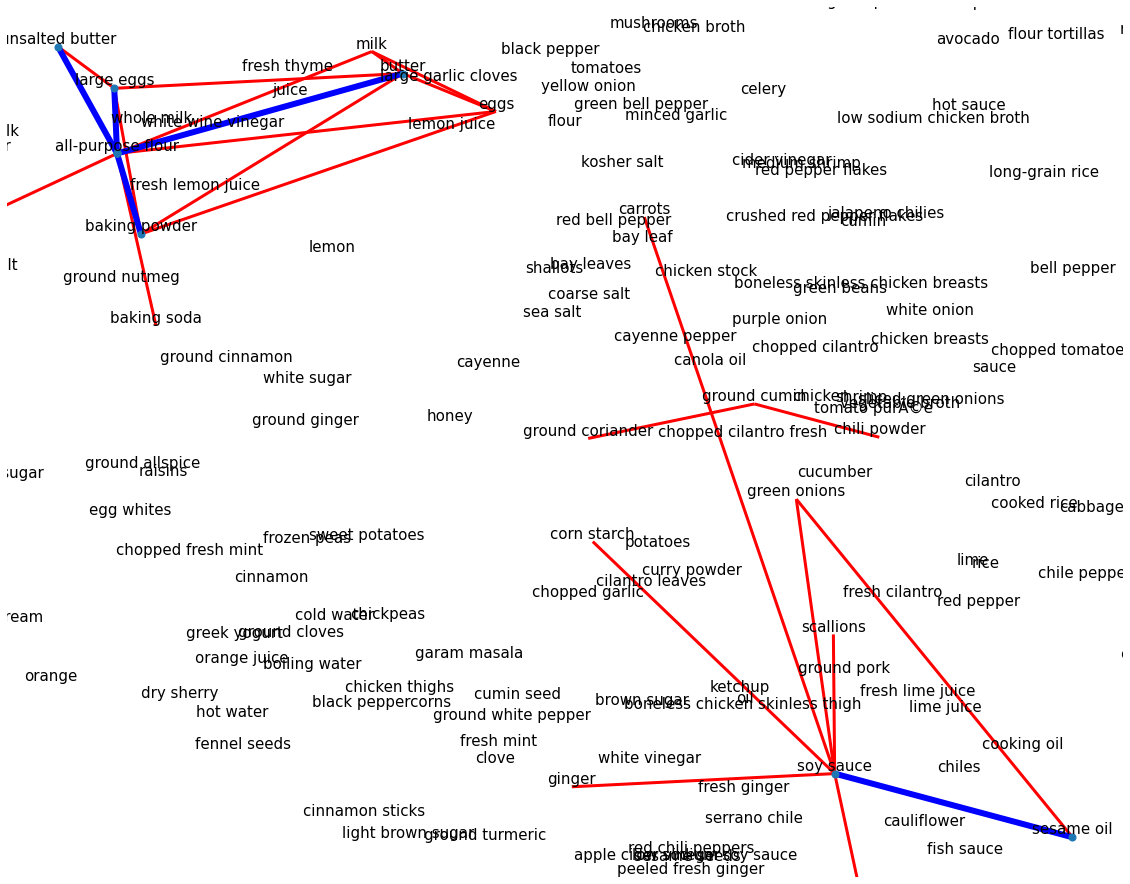

In [47]:
import matplotlib.pyplot as plt
elarger = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 500]

elargerer = [(u, v) for (u, v, d) in SG.edges(data=True) if d["weight"] > 1000]

nodes_top = []
for (u, v, d) in SG.edges(data=True):
    if d["weight"] > 1000:
        nodes_top.append(u)
        nodes_top.append(v)


plt.figure(1,figsize=(20,16))
pos = nx.spring_layout(SG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(nodes_top, pos, node_size=50)
nx.draw_networkx_edges(SG, pos, edgelist=elarger, width=3, edge_color = 'r')
nx.draw_networkx_edges(SG, pos, edgelist=elargerer, width=6, edge_color = 'b')
nx.draw_networkx_labels(SG, pos, font_size=15, font_family="sans-serif", verticalalignment='bottom' )
plt.axis("off")
plt.show()

# node2vec = Node2Vec(B, dimensions=100, walk_length=16, num_walks=100, workers = 4)


In [49]:
X_embedded = TSNE(n_components=2).fit_transform(X)

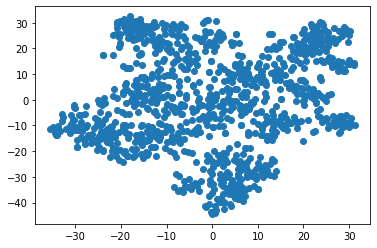

In [50]:
df = pd.DataFrame(X_embedded, columns=['x', 'y'])

tsne_results=pd.DataFrame(X_embedded, columns=['x', 'y'])

plt.scatter(tsne_results['x'], tsne_results['y'])

plt.show()

[[  3.2941246 -30.47627  ]
 [ 20.65634    18.86559  ]
 [ 12.628677   -2.8540995]
 [-17.941174   -9.0955925]
 [ -9.95565    21.034044 ]]


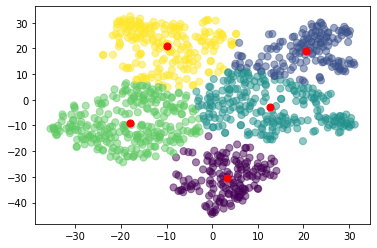

In [51]:
kmeans = cluster.KMeans(n_clusters=6)
 
kmeans = KMeans(n_clusters=5).fit(tsne_results)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(tsne_results['x'], tsne_results['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<span style="color:red"> 

- falta interpretar esta parte. 

</span>